In [ ]:
#Recommendation System Notebook
#User based recommendation
#User based prediction
#Item based recommendation
#Item based prediction
#Evaluation

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reading beer file
beer = pd.read_csv('beer_data.csv', encoding='latin-1')

In [3]:
#summary of the dataset: 475984 rows, 3 columns
beer.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [13]:
print(beer.shape)



(475984, 3)


In [102]:
#missing information
beer.isnull().any()

beer_beerid           False
review_profilename     True
review_overall        False
dtype: bool

In [103]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [104]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
beer.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


In [105]:
#Multivariable Analysis
# Checking Categorical Data
beer.select_dtypes(include=['object']).columns

Index(['review_profilename'], dtype='object')

In [45]:
# Checking Numerical Data
beer.select_dtypes(include=['int64','float64']).columns

Index(['beer_beerid', 'review_overall'], dtype='object')

In [46]:
cat = len(beer.select_dtypes(include=['object']).columns)
num = len(beer.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  1 categorical + 2 numerical = 3 features


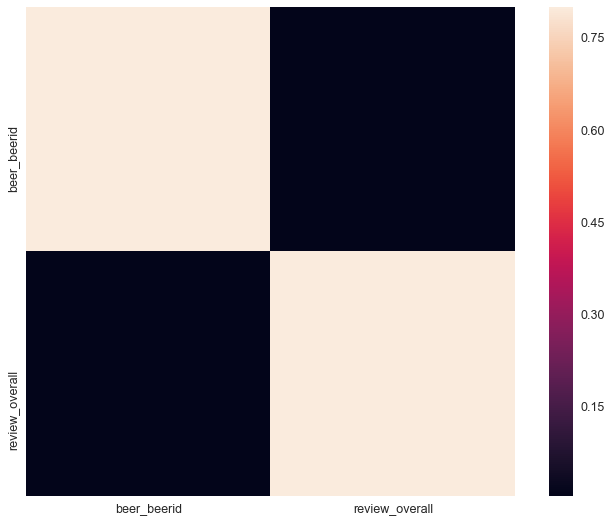

In [47]:
# Correlation Matrix Heatmap
corrmat = beer.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

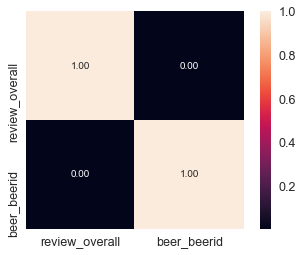

In [48]:
# Top 2 Heatmap
k = 2 #number of variables for heatmap
cols = corrmat.nlargest(k, 'review_overall')['review_overall'].index
cm = np.corrcoef(beer[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [49]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,review_overall
1,beer_beerid


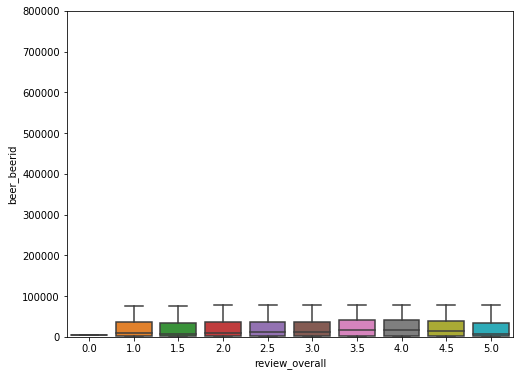

In [144]:
# Beer_id vs Review
var = 'review_overall'
data = pd.concat([beer['beer_beerid'], beer[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="beer_beerid", data=data)
fig.axis(ymin=0, ymax=800000);

In [4]:
# Function to display null percentages in descending order
def null_summary(data):
    df = pd.DataFrame([data.isnull().sum(),
              round(100*(data.isnull().sum()/len(data.index)), 2)]
            ).T.rename(columns={0:'Null Count',1:'Null Percentage'}).\
sort_values(by='Null Percentage',ascending=False)
    return df

In [5]:
null_summary(beer)

,Null Count,Null Percentage
review_profilename,100.0,0.02
beer_beerid,0.0,0.00
review_overall,0.0,0.00


In [ ]:
#Total 100 reviews have empty review_profilename


In [6]:
#Removing missing value

listcol=['review_profilename']

beer[listcol]=beer[listcol].apply(lambda x: x.fillna('others'))
#beer[listcol]=beer[listcol].apply(lambda x: x.fillna(0))

In [7]:
null_summary(beer[listcol])

beer[listcol]

,review_profilename
0,stcules
1,oline73
2,alpinebryant
3,rawthar
4,RangerClegg
5,mikedrinksbeer2
6,dbmernin83
7,Blakaeris
8,bashiba
9,oberon


In [11]:
#missing information after null value treatment
beer.isnull().any()

beer_beerid           False
review_profilename    False
review_overall        False
dtype: bool

In [21]:
#The output shows us that no columns are empty.


In [12]:
#Checking duplicate
sum(beer.duplicated())

580

In [13]:
#Checking for duplicates where both item and user are duplicated
dup_beerid = sum(beer.duplicated('beer_beerid'))
dup_rating =  sum(beer.duplicated('review_overall'))
print(dup_beerid)
print(dup_rating)




435676
475974


In [12]:
#Checking for duplicates where both item and user are duplicated or same user gave multiple ratings to same beer.
df_dup=len( beer.drop_duplicates(subset=['beer_beerid', 'review_profilename']))
df_dup

474560

In [15]:
#drop duplicates
beer.drop_duplicates()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
5,58046,mikedrinksbeer2,4.5
6,58046,dbmernin83,4.0
7,58046,Blakaeris,4.5
8,58046,bashiba,4.5
9,58046,oberon,4.0


In [16]:
#identify the unique number of review_profilename
len(beer.review_profilename.unique())


22498

In [17]:
##identify the unique number of beer_beerid
len(beer.beer_beerid.unique())

40308

In [4]:
#distict reviews
beer_rev=pd.DataFrame(beer.groupby(['review_profilename', 'beer_beerid']).size().rename('Freq'))
beer_rev

Freq
review_profilename beer_beerid      
0110x011           945             1
                   1093            1
                   1545            1
                   1558            1
                   3833            1
                   6305            1
                   7597            1
                   7978            1
                   8954            1
                   10325           1
                   10386           1
                   10672           1
                   11757           1
                   12068           1
                   15881           1
                   20518           1
                   20781           1
                   21363           1
                   22505           1
                   25283           1
                   25435           1
                   29127           1
                   34483           1
                   34956           1
                   36179           1
                   36728           1
                   38470           1
                   42296           1
                   42533           1
                   42878           1
...                              ...
zymurgy4all        1464            1
                   1774            1
                   2137            1
                   2176            1
                   2967            1
                   3347            1
                   3631            1
                   3936            1
                   3937            1
                   3938            1
                   3960            1
                   4700            1
                   5199            1
                   5643            1
                   12382           1
                   14712           1
                   22527           1
                   28712           1
                   29015           1
                   36692           1
                   37477           1
zymurgywhiz        1904            1
                   43118           1
zythus             574             1
                   576             1
                   2412            1
zyzygy             141             1
                   27514           1
                   28687           1
zzajjber           2270            1

[474462 rows x 1 columns]

In [5]:
#I. Data Preparation
#Choose only those beers that have at least N number of reviews
#Lets find all distinct beers & total reviews they received
beer_reviews_count=beer.groupby('beer_beerid', as_index=False).agg({"review_overall": "count"}).sort_values(['review_overall'], ascending=[False])
beer_reviews_count


,beer_beerid,review_overall
1574,2093,987
338,412,976
1427,1904,905
818,1093,848
78,92,818
2963,4083,808
221,276,793
5451,7971,790
75,88,759
770,1013,758


In [7]:
#summary values
beer_reviews_count.describe()

,beer_beerid,review_overall
count,40308.000000,40308.000000
mean,36971.524561,11.808673
std,22544.537693,42.095425
min,3.000000,1.000000
25%,16878.750000,1.000000
50%,37362.000000,2.000000
75%,56232.250000,5.000000
max,77317.000000,987.000000


In [24]:
#Beers have reviews count in range of 1 to 987, beer 2093 have highest number of reviews(987).

In [6]:
#Lets also count number of distinct users
user_reviews_count=beer.groupby('review_profilename', as_index=False).agg({"review_overall": "count"}).sort_values(['review_overall'], ascending=[False])
user_reviews_count

,review_profilename,review_overall
18188,northyorksammy,1846
17373,mikesgroove,1379
1629,BuckeyeNation,1338
8470,Thorpe429,1072
1910,ChainGangGuy,1046
6143,NeroFiddled,1031
22187,womencantsail,1013
10937,brentk56,1000
8971,WesWes,977
6647,Phyl21ca,973


In [ ]:
#user: northyorksammy have given max reviews.

In [ ]:
#To find an ideal value of N its important that we choose beers having large enough number of reviews to avoid cold start problem.

In [ ]:
#So Lets further analyze beers by number of reviews each one have received. lets start with all beers with single review.

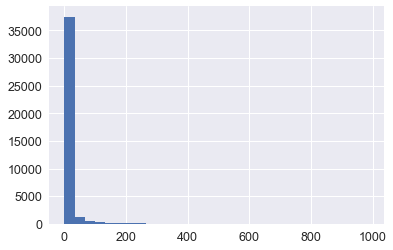

In [69]:
beer_reviews_count['review_overall'].hist(bins=30)



In [7]:
#Checking single review
beer_reviews_count_1=beer_reviews_count.loc[(beer_reviews_count['review_overall'] == 1)]
beer_reviews_count_1

,beer_beerid,review_overall
36952,69559,1
39637,75476,1
39642,75489,1
39612,75422,1
39779,75835,1
39536,75221,1
37063,69791,1
36971,69605,1
39778,75834,1
30306,56391,1


In [27]:
#So 18056 or 44.7% beers have only 1 review, lets group by total reviews & find count for each.

In [8]:
review_frequency=beer_reviews_count.groupby('review_overall', as_index=False).agg({"beer_beerid": "count"})
review_frequency.head(10)

,review_overall,beer_beerid
0,1,18056
1,2,6188
2,3,3072
3,4,1909
4,5,1347
5,6,962
6,7,790
7,8,555
8,9,476
9,10,408


In [9]:
review_frequency=beer_reviews_count.groupby('review_overall', as_index=False).count()
review_frequency.head(10)

,review_overall,beer_beerid
0,1,18056
1,2,6188
2,3,3072
3,4,1909
4,5,1347
5,6,962
6,7,790
7,8,555
8,9,476
9,10,408


In [ ]:
#It seems that most beers get very few reviews. In fact very few beers have large enough number of reviews required for building recommendation system based on collaborative filtering.

In [ ]:
#Filtering by beers having atleast 50 reviews & users having reviewed atleast 30 beers as there are more distinct beers(40308)

In [10]:
beer_reviews_count_subset=beer_reviews_count.loc[(beer_reviews_count['review_overall'] >= 50)]
beer_reviews_count_subset

,beer_beerid,review_overall
1574,2093,987
338,412,976
1427,1904,905
818,1093,848
78,92,818
2963,4083,808
221,276,793
5451,7971,790
75,88,759
770,1013,758


In [ ]:
#Now we are left with a dataset of these distinct beer ids each having more than 50 reviews each.

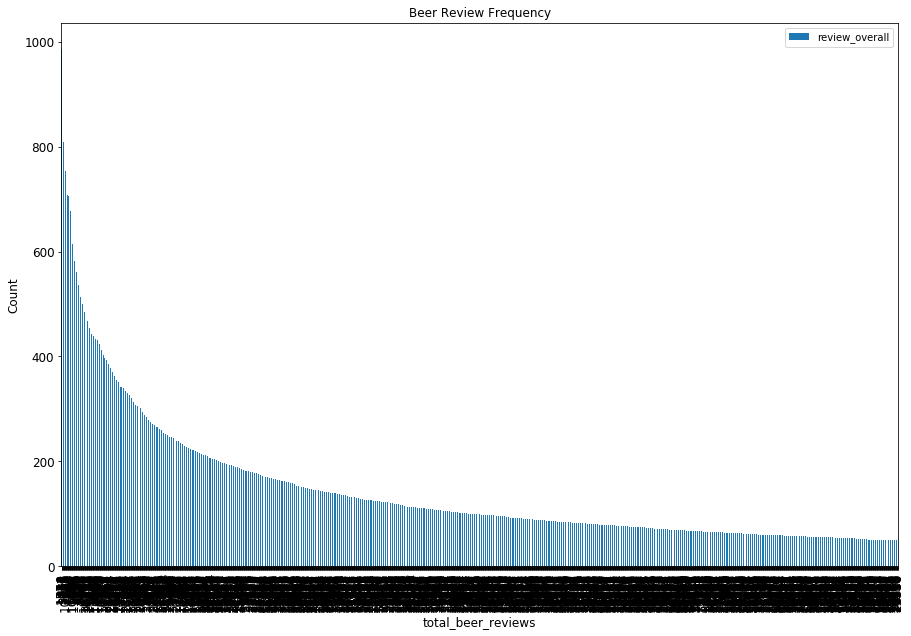

In [121]:
#Lets check beer review frequency now
import matplotlib.pyplot as plt
ax = beer_reviews_count_subset[['review_overall']].plot(kind='bar', title ="Beer Review Frequency", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("total_beer_reviews", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [11]:
#Lets also filter beer dataset based on users who have atleast reviewed 30 beers each
user_reviews_count=beer.groupby('review_profilename', as_index=False).agg({"review_overall": "count"})
user_reviews_count.head(10)

,review_profilename,review_overall
0,0110x011,35
1,01Ryan10,1
2,03SVTCobra,1
3,04101Brewer,1
4,05Harley,41
5,0beerguy0,3
6,0runkp0s,1
7,0tt0,14
8,1000Bottles,8
9,1001111,2


In [12]:
user_reviews_count_subset=user_reviews_count.loc[(user_reviews_count['review_profilename'] >= '30')]
user_reviews_count_subset.head(10)

,review_profilename,review_overall
77,31thadrty1,2
78,321jeff,29
79,32hoss32,36
80,33nickadams,18
81,3FaveryRogue,6
82,3HovsepiansBrews,11
83,3Vandoo,101
84,3dudesbeerblog,1
85,3frog,4
86,3leggeddub,5


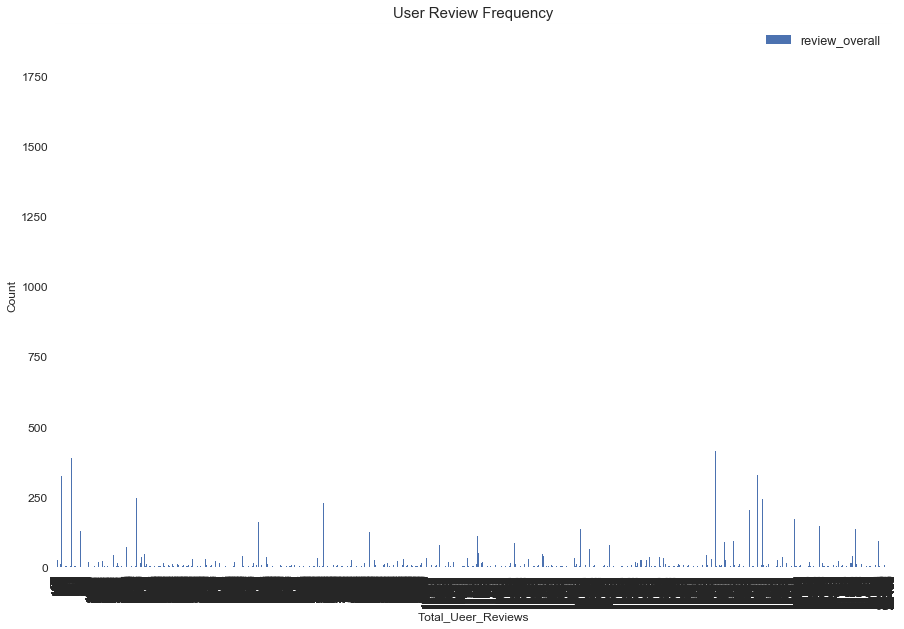

In [85]:
#Lets check beer review frequency now
import matplotlib.pyplot as plt
ax = user_reviews_count_subset[['review_overall']].plot(kind='bar', title ="User Review Frequency", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Total_Ueer_Reviews", fontsize=12)
ax.set_ylabel("Count", fontsize=12)



plt.show()

In [13]:
#Rename column
beer_reviews_count_subset.rename(columns={'review_overall': 'total_beer_reviews'}, inplace=True)
beer_reviews_count_subset.head()

,beer_beerid,total_beer_reviews
1574,2093,987
338,412,976
1427,1904,905
818,1093,848
78,92,818


In [14]:
#Rename column
user_reviews_count_subset.rename(columns={'review_overall': 'total_user_reviews'}, inplace=True)
user_reviews_count_subset.head()

,review_profilename,total_user_reviews
77,31thadrty1,2
78,321jeff,29
79,32hoss32,36
80,33nickadams,18
81,3FaveryRogue,6


In [15]:
#merging the data set
important_beers=pd.merge(beer, beer_reviews_count_subset, on='beer_beerid')
important_beers=pd.merge(important_beers, user_reviews_count_subset, on='review_profilename')
important_beers.head()

,beer_beerid,review_profilename,review_overall,total_beer_reviews,total_user_reviews
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,433,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,55,518


In [127]:
important_beers.describe()

,beer_beerid,review_overall,total_beer_reviews,total_user_reviews
count,296831.000000,296831.000000,296831.000000,296831.000000
mean,15399.275884,3.882191,248.776075,185.331630
std,18794.738223,0.699038,196.029836,223.991188
min,5.000000,1.000000,50.000000,1.000000
25%,1013.000000,3.500000,100.000000,36.000000
50%,3951.000000,4.000000,182.000000,106.000000
75%,28578.000000,4.500000,340.000000,247.000000
max,75086.000000,5.000000,987.000000,1846.000000


In [ ]:
#This beer subset have substantial ratings by both users & beers.

In [ ]:
#We can tell that the average rating is 3.88 and the max is 5. We also see that the dataset has 296831 records.

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [108]:
important_beers.groupby('review_profilename')['review_overall'].mean().sort_values(ascending=False).head()

review_profilename
zzajjber        5.0
scoot64         5.0
Mikepett2011    5.0
scotty2hotty    5.0
scottder        5.0
Name: review_overall, dtype: float64

In [109]:
important_beers.groupby('review_profilename')['review_overall'].count().sort_values(ascending=False).head()

review_profilename
BuckeyeNation     520
mikesgroove       509
BEERchitect       465
northyorksammy    456
WesWes            456
Name: review_overall, dtype: int64

In [110]:
ratings = pd.DataFrame(important_beers.groupby('review_profilename')['review_overall'].mean())
ratings.head()

,review_overall
review_profilename,
31thadrty1,2.750000
321jeff,4.454545
32hoss32,3.788462
33nickadams,3.916667
3FaveryRogue,4.166667


In [111]:
#Now set the number of ratings column:
ratings['num of ratings'] = pd.DataFrame(important_beers.groupby('review_profilename')['review_overall'].count())
ratings.head()

,review_overall,num of ratings
review_profilename,,
31thadrty1,2.750000,2
321jeff,4.454545,11
32hoss32,3.788462,26
33nickadams,3.916667,12
3FaveryRogue,4.166667,3


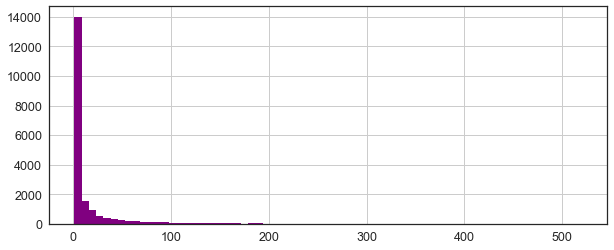

In [112]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70,color='purple')

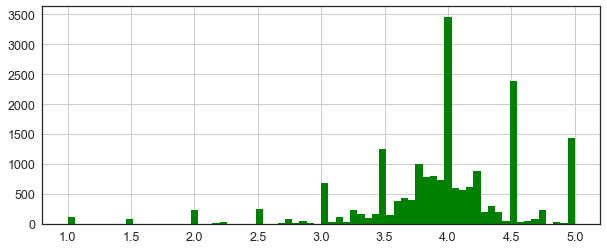

In [114]:
plt.figure(figsize=(10,4))
ratings['review_overall'].hist(bins=70,color='green')

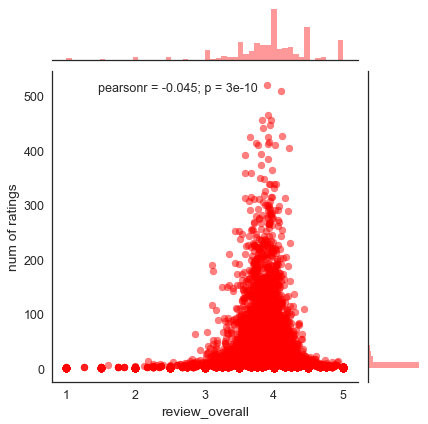

In [116]:
sns.jointplot(x='review_overall',y='num of ratings',data=ratings,alpha=0.5,color='red')

In [140]:
#What are the unique values of ratings?
len(important_beers.review_overall.unique())

9

In [141]:
#What are the unique values of ratings?

important_beers=important_beers.groupby('review_overall').count()
important_beers

,beer_beerid,review_profilename,total_beer_reviews,total_user_reviews
review_overall,,,,
1.0,1710,1710,1710,1710
1.5,1903,1903,1903,1903
2.0,6031,6031,6031,6031
2.5,9133,9133,9133,9133
3.0,27131,27131,27131,27131
3.5,52120,52120,52120,52120
4.0,111289,111289,111289,111289
4.5,67287,67287,67287,67287
5.0,20227,20227,20227,20227


In [130]:
#So rating 4.0 & 4.5 are most common, 1.0 & 1.5 are least common.

9

In [144]:
#4. Visualize the rating values and notice:
#(i) The average beer ratings
avg_beer_ratings = pd.DataFrame(important_beers.groupby('beer_beerid')['review_overall'].mean())
avg_beer_ratings.head()

,review_overall
beer_beerid,
5,3.553097
6,3.711155
7,3.321951
10,3.883028
14,3.830508


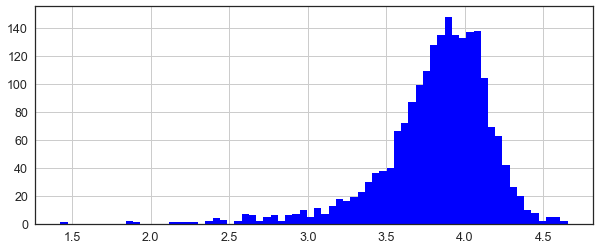

In [146]:
plt.figure(figsize=(10,4))
avg_beer_ratings['review_overall'].hist(bins=70,color='blue')

In [147]:
avg_beer_ratings.describe()

,review_overall
count,2069.000000
mean,3.818884
std,0.352403
min,1.425676
25%,3.668919
50%,3.875000
75%,4.049419
max,4.655797


In [ ]:
#So average beer ratings(Mean)=3.898 & almost normal, slightly left skewed..

In [148]:
#Also checking on original full dataset of beers

avg_beer_ratings_all = pd.DataFrame(beer.groupby('beer_beerid')['review_overall'].mean())
avg_beer_ratings_all.head()

,review_overall
beer_beerid,
3,4.250000
4,3.666667
5,3.553097
6,3.711462
7,3.317961


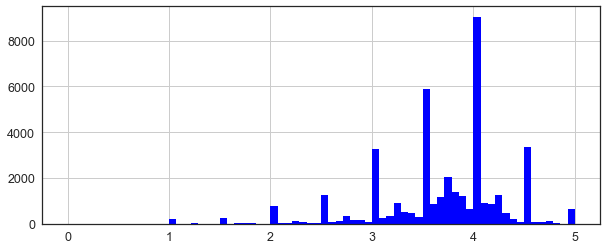

In [149]:
plt.figure(figsize=(10,4))
avg_beer_ratings_all['review_overall'].hist(bins=70,color='blue')

In [150]:
avg_beer_ratings_all.describe()

,review_overall
count,40308.000000
mean,3.670518
std,0.642765
min,0.000000
25%,3.500000
50%,3.800000
75%,4.000000
max,5.000000


In [ ]:
#So average beer ratings(Mean)=3.67 & uneven distribution.

In [151]:
#(ii) The average user ratings
avg_user_ratings = pd.DataFrame(important_beers.groupby('review_profilename')['review_overall'].mean())
avg_user_ratings.head()

,review_overall
review_profilename,
31thadrty1,2.750000
321jeff,4.454545
32hoss32,3.788462
33nickadams,3.916667
3FaveryRogue,4.166667


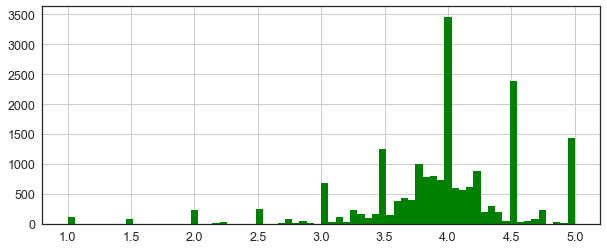

In [152]:
plt.figure(figsize=(10,4))
avg_user_ratings['review_overall'].hist(bins=70,color='green')

In [153]:
avg_user_ratings.describe()

,review_overall
count,19432.000000
mean,3.949768
std,0.622031
min,1.000000
25%,3.714286
50%,4.000000
75%,4.300000
max,5.000000


In [ ]:
#So average beer ratings(Mean)=3.949  slightly left skewed & uneven distribution.

In [154]:
#(iii) The average number of ratings given to the beers
avg_beer_reviews = pd.DataFrame(important_beers.groupby('beer_beerid')['total_beer_reviews'].mean())
avg_beer_reviews.head()

,total_beer_reviews
beer_beerid,
5,113
6,253
7,206
10,219
14,59


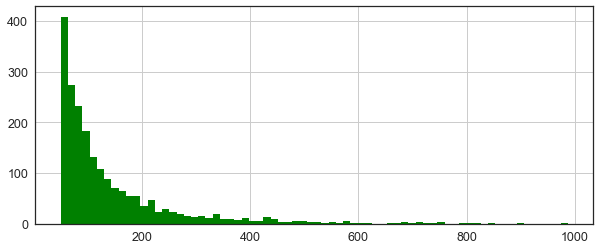

In [156]:
plt.figure(figsize=(10,4))
avg_beer_reviews['total_beer_reviews'].hist(bins=70,color='green')

In [157]:
avg_beer_reviews.describe()

,total_beer_reviews
count,2069.000000
mean,143.714838
std,122.938242
min,50.000000
25%,68.000000
50%,99.000000
75%,168.000000
max,987.000000


In [ ]:
#So on average each beer gets ~143.7 reviews from chosen subset.

In [160]:
#Also checking on original full dataset of beers
avg_beer_reviews_all = pd.DataFrame(beer.groupby('beer_beerid')['review_overall'].mean())
avg_beer_reviews_all.head()

,review_overall
beer_beerid,
3,4.250000
4,3.666667
5,3.553097
6,3.711462
7,3.317961


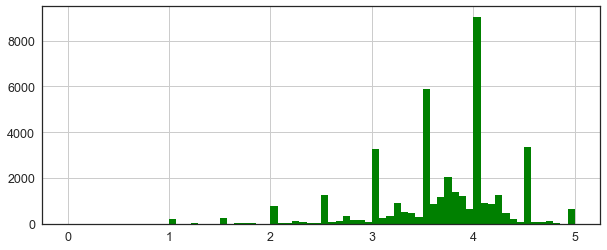

In [161]:
plt.figure(figsize=(10,4))
avg_beer_reviews_all['review_overall'].hist(bins=70,color='green')

In [162]:
avg_beer_reviews_all.describe()

,review_overall
count,40308.000000
mean,3.670518
std,0.642765
min,0.000000
25%,3.500000
50%,3.800000
75%,4.000000
max,5.000000


In [164]:
#(iv) The average number of ratings given by the users
avg_user_reviews = pd.DataFrame(important_beers.groupby('review_profilename')['total_user_reviews'].mean())
avg_user_reviews.head()

,total_user_reviews
review_profilename,
31thadrty1,2
321jeff,29
32hoss32,36
33nickadams,18
3FaveryRogue,6


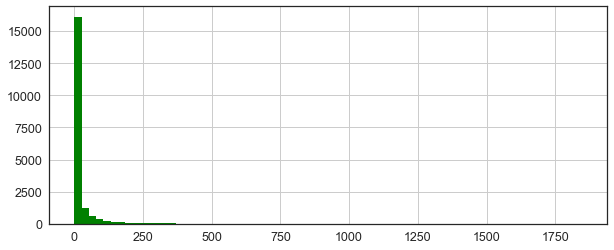

In [165]:
plt.figure(figsize=(10,4))
avg_user_reviews['total_user_reviews'].hist(bins=70,color='green')

In [166]:
avg_user_reviews.describe()

,total_user_reviews
count,19432.000000
mean,24.263020
std,70.162076
min,1.000000
25%,1.000000
50%,4.000000
75%,14.000000
max,1846.000000


In [ ]:
#So on average each user gives ~101 reviews, but this distribution is very skewed.

In [23]:
##Also checking on original full dataset of beers
avg_user_reviews_all = pd.DataFrame(beer.groupby('review_profilename')['review_overall'].mean())
avg_user_reviews_all.head()

,review_overall
review_profilename,
0110x011,4.285714
01Ryan10,5.000000
03SVTCobra,1.000000
04101Brewer,4.000000
05Harley,4.158537


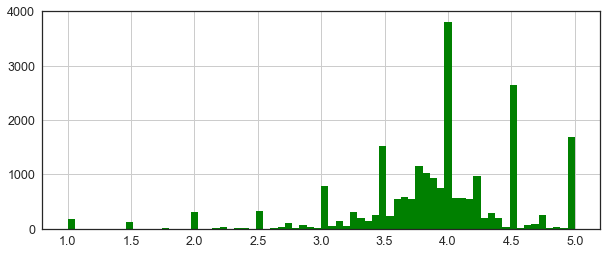

In [168]:
plt.figure(figsize=(10,4))
avg_user_reviews_all['review_overall'].hist(bins=70,color='green')

In [16]:
important_beers.shape

(296831, 5)

In [17]:
#Filtering data & take  subset of dataset for executing user & item similarity matrix faster.
df=important_beers.loc[(important_beers['total_user_reviews'] >10)]
df.shape

(264575, 5)

In [18]:
beers_rrmatrix=df[['beer_beerid','review_profilename','review_overall']]
beers_rrmatrix.head()

,beer_beerid,review_profilename,review_overall
0,436,Brent,3.0
1,10784,Brent,4.0
2,16074,Brent,4.0
3,33644,Brent,4.0
4,1122,Brent,5.0


In [19]:
beers_rrmatrix.shape

(264575, 3)

In [20]:
#renaming the columns
beers_rrmatrix.columns=['item','user','rating']
beers_rrmatrix.head()

,item,user,rating
0,436,Brent,3.0
1,10784,Brent,4.0
2,16074,Brent,4.0
3,33644,Brent,4.0
4,1122,Brent,5.0


In [21]:
## dropping duplicate values 
beers_rrmatrix.drop_duplicates(keep=False,inplace=True)

In [22]:
#Dividing the dataset into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(beers_rrmatrix, test_size=0.30, random_state=31)

In [23]:
print(train.shape)
print(test.shape)

(184628, 3)
(79127, 3)


In [24]:
## pivot ratings into beer features
df_beer_features=pd.pivot_table(train,index='user', columns='item', values='rating').fillna(0)
df_beer_features.head()

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32hoss32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33nickadams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3HovsepiansBrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
dummy_train = train.copy()
dummy_test = test.copy()

In [26]:
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [27]:
# The beer not rated by user is marked as 1 for prediction. 
dummy_train = pd.pivot_table(dummy_train,index='user', columns='item', values='rating').fillna(1)

# The beer not rated by user is marked as 0 for evaluation. 
dummy_test =  pd.pivot_table(dummy_test,index='user', columns='item', values='rating').fillna(0)


In [28]:
dummy_train.head()

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
32hoss32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
33nickadams,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3HovsepiansBrews,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3Vandoo,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
dummy_test.head()

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32hoss32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33nickadams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3HovsepiansBrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3Vandoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#User Similarity Matrix

#Using Cosine Similarity

from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.07920784 0.12910727]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.11962031 0.        ]
 [0.         0.07920784 0.         ... 0.11962031 1.         0.05776967]
 [0.         0.12910727 0.         ... 0.         0.05776967 1.        ]]


In [31]:
user_correlation.shape

(5703, 5703)

In [32]:
#Using adjusted Cosine
df_beer_features=pd.pivot_table(train,index='user', columns='item', values='rating')
df_beer_features.head()

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32hoss32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33nickadams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3HovsepiansBrews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Normalising the rating of the beer for each user aroung 0 mean
mean = np.nanmean(df_beer_features, axis=1)
df_subtracted = (df_beer_features.T-mean).T

In [34]:
df_subtracted.head()

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32hoss32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33nickadams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3HovsepiansBrews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3Vandoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Finding cosine similarity
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ...  0.          0.03481386
   0.03111522]
 [ 0.          0.          1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.08862357
   0.        ]
 [ 0.          0.03481386  0.         ...  0.08862357  1.
  -0.00327874]
 [ 0.          0.03111522  0.         ...  0.         -0.00327874
   1.        ]]


In [36]:
#Prediction
#Doing the prediction for the users which are positively related with other users, and not the users wwhich are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03481386,
        0.03111522],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.08862357,
        0.        ],
       [0.        , 0.03481386, 0.        , ..., 0.08862357, 1.        ,
        0.        ],
       [0.        , 0.03111522, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#Rating predicted by the user (for beer rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset).




In [37]:
user_predicted_ratings = np.dot(user_correlation, df_beer_features.fillna(0))
user_predicted_ratings

array([[ 0.54083252,  1.09109874,  1.43823343, ...,  0.74857915,
         2.31313447,  1.41577249],
       [ 2.16677123,  7.27233648,  5.41533272, ...,  0.52236864,
         0.92569093,  1.48065806],
       [ 2.32294805,  5.09627034,  4.29283796, ...,  1.92460401,
         4.98740334,  3.41457405],
       ...,
       [ 2.77285905,  4.87045476,  4.1448942 , ...,  0.87189794,
         3.08049824,  4.19877221],
       [ 7.36399433, 10.47036725,  7.63654343, ...,  1.18307786,
         4.2238404 ,  3.44384845],
       [ 3.24093465,  7.76714211,  7.20221701, ...,  0.35764625,
         1.4547678 ,  2.36357886]])

In [38]:
user_predicted_ratings.shape

(5703, 2069)

In [ ]:
#Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero. 

In [39]:
#Display 1st 10 users
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(10)

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,0.540833,1.091099,1.438233,1.324315,0.189798,0.404485,1.453292,1.047761,3.468564,2.650704,...,2.012939,0.269462,0.531278,0.802214,0.833778,0.067767,1.052841,0.748579,2.313134,1.415772
32hoss32,2.166771,7.272336,5.415333,8.199014,1.389116,2.041471,5.293346,4.902275,11.551415,8.157514,...,2.037480,0.709635,0.366885,0.354863,1.462383,1.238698,0.853989,0.522369,0.925691,1.480658
33nickadams,2.322948,5.096270,4.292838,3.324244,1.215554,1.489135,3.795125,2.478138,7.959891,6.351988,...,4.021836,2.030106,1.308333,1.175748,2.368532,1.068014,1.862195,1.924604,4.987403,3.414574
3HovsepiansBrews,2.082833,3.227351,1.152601,4.017306,0.562380,0.591240,2.868688,2.815708,8.100602,4.877964,...,4.895176,1.812747,1.095686,0.266060,0.160495,1.869554,0.623721,1.291977,2.147529,2.815806
3Vandoo,4.853510,6.087600,5.893448,5.779446,2.731978,1.750770,6.664809,4.070383,17.024227,15.915292,...,3.551453,0.702257,1.599750,2.270438,1.129466,1.382382,1.347392,1.593100,2.812081,2.348792
3rdRowTailgater,1.855077,2.271943,1.097603,3.721410,1.440380,0.876997,1.710108,2.749827,6.017185,3.704005,...,1.109751,0.772108,0.417963,0.016561,0.135900,0.817452,0.352239,0.319044,0.732978,0.771014
4000qtrap,1.464307,4.228700,3.187121,3.884032,0.916504,1.021656,3.718976,2.949354,7.707263,6.159560,...,2.191136,0.934777,1.151381,1.128700,1.610571,1.408482,1.171092,0.628297,2.454341,1.387400
49degrees,0.740320,2.214137,1.705614,1.970351,0.472122,0.803822,2.643729,2.082645,4.877491,2.130244,...,1.328138,0.564868,0.741775,0.613078,0.592597,0.562482,0.975865,0.236796,1.512399,1.697362
4DAloveofSTOUT,1.281896,2.194441,1.526237,3.932484,0.686953,0.552820,2.435894,2.406272,8.082513,4.081239,...,4.840272,1.501071,0.601872,0.932761,1.372055,0.799172,1.190280,1.032108,3.445718,2.011740


In [ ]:
#Determine how similar the first 10 users are to each other and visualise it.
#Users Similarity matrix shown in above.

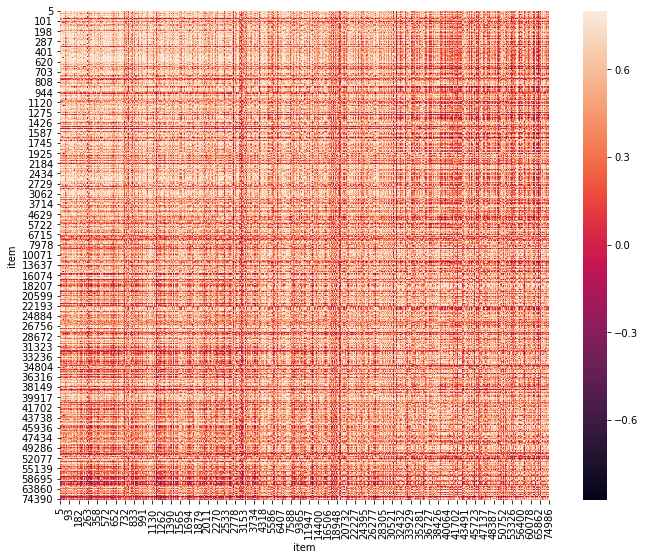

In [75]:
# Correlation Matrix Heatmap
corrmat = user_final_rating.head(10).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

matplotlib.axes._subplots.AxesSubplot

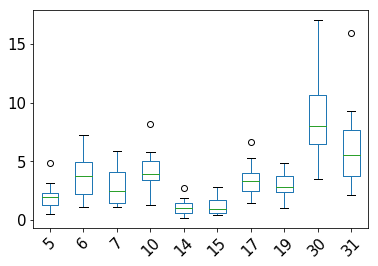

In [191]:
#first 10 users & similarity to each other
boxplot = user_final_rating.iloc[0:10,0:10].boxplot(grid=False, rot=45, fontsize=15)
type(boxplot)

In [76]:
#Finding the top 5 recommendation for the user 1
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

item
2093    24.349067
92      18.999180
276     18.534618
355     18.225696
1093    18.043514
Name: 32hoss32, dtype: float64

In [128]:
#Top 5 Beer recommondation for user Cokes
user_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

item
2093    43.306349
412     42.014024
1093    39.700668
1904    38.106582
4083    37.884293
Name: cokes, dtype: float64

In [129]:
#Top 5 beers recommondation for user genog

user_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

item
1093     31.511158
2093     31.121485
1904     27.755847
412      27.699845
11757    26.712719
Name: genog, dtype: float64

In [130]:
#Top 5 Beer recommondation for user giblet
user_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

item
412     52.165990
355     49.269794
2093    49.035349
4083    47.655773
104     46.844821
Name: giblet, dtype: float64

In [ ]:
#Item Based Similarity
#Using Correlation Taking the transpose of the rating matrix to normalize the rating around the mean for different beerID. In the user based similarity, we had taken mean for each user intead of each beer. 

In [77]:
df_beer_features=pd.pivot_table(train,index='user', columns='item', values='rating').T
df_beer_features.head()

user,321jeff,32hoss32,33nickadams,3HovsepiansBrews,3Vandoo,3rdRowTailgater,4000qtrap,49degrees,4DAloveofSTOUT,51mmz0rz,...,znichols,zoolzoo,zoso1967,zoso493,zplug123,zrab11,ztaylor1,zuffenhausen,zuggy9,zymurgy4all
item,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Normalising the beer rating for each beer

In [78]:
mean = np.nanmean(df_beer_features, axis=1)
df_subtracted = (df_beer_features.T-mean).T

In [79]:
df_subtracted.head()

user,321jeff,32hoss32,33nickadams,3HovsepiansBrews,3Vandoo,3rdRowTailgater,4000qtrap,49degrees,4DAloveofSTOUT,51mmz0rz,...,znichols,zoolzoo,zoso1967,zoso493,zplug123,zrab11,ztaylor1,zuffenhausen,zuggy9,zymurgy4all
item,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [80]:
# Item Similarity Matrix
from sklearn.metrics.pairwise import pairwise_distances
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -3.17739085e-03  8.71376475e-02 ... -2.77880272e-02
   0.00000000e+00  1.28999793e-02]
 [-3.17739085e-03  1.00000000e+00 -5.71851209e-03 ...  9.07402526e-02
   2.52900210e-03 -3.90800806e-02]
 [ 8.71376475e-02 -5.71851209e-03  1.00000000e+00 ...  2.34264566e-05
   2.50492869e-05 -4.83832291e-03]
 ...
 [-2.77880272e-02  9.07402526e-02  2.34264566e-05 ...  1.00000000e+00
   5.57009644e-03  2.05735558e-02]
 [ 0.00000000e+00  2.52900210e-03  2.50492869e-05 ...  5.57009644e-03
   1.00000000e+00 -2.46556770e-02]
 [ 1.28999793e-02 -3.90800806e-02 -4.83832291e-03 ...  2.05735558e-02
  -2.46556770e-02  1.00000000e+00]]


In [ ]:
#Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [81]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.00000000e+00, 0.00000000e+00, 8.71376475e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.28999793e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.07402526e-02, 2.52900210e-03, 0.00000000e+00],
       [8.71376475e-02, 0.00000000e+00, 1.00000000e+00, ...,
        2.34264566e-05, 2.50492869e-05, 0.00000000e+00],
       ...,
       [0.00000000e+00, 9.07402526e-02, 2.34264566e-05, ...,
        1.00000000e+00, 5.57009644e-03, 2.05735558e-02],
       [0.00000000e+00, 2.52900210e-03, 2.50492869e-05, ...,
        5.57009644e-03, 1.00000000e+00, 0.00000000e+00],
       [1.28999793e-02, 0.00000000e+00, 0.00000000e+00, ...,
        2.05735558e-02, 0.00000000e+00, 1.00000000e+00]])

In [82]:
#Prediction
item_predicted_ratings = np.dot((df_beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.79341797, 0.23246528, 0.4470623 , ..., 0.28568805, 0.45134066,
        0.19031895],
       [0.54413033, 1.02319591, 0.94703368, ..., 0.95773582, 0.37810469,
        0.77445997],
       [0.18295212, 0.25185846, 0.5191924 , ..., 0.24894369, 0.48411108,
        0.12404936],
       ...,
       [1.22593098, 0.26635737, 0.59306563, ..., 0.11994397, 0.39578564,
        0.5688638 ],
       [0.2954605 , 0.74188112, 0.61407677, ..., 0.31151285, 0.24276134,
        0.38222261],
       [0.8121319 , 0.8957635 , 1.1388651 , ..., 0.39399467, 0.12800669,
        0.71745105]])

In [83]:
item_predicted_ratings.shape

(5703, 2069)

In [84]:
dummy_train.shape

(5703, 2069)

In [ ]:
#Filtering the rating only for the beers not rated by the user for recommendation

In [86]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head(10)

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,0.793418,0.232465,0.447062,0.359459,0.213930,0.111387,0.509639,0.277868,0.911245,0.707086,...,0.512594,0.090433,0.151085,0.280047,0.197924,0.143055,0.199910,0.285688,0.451341,0.190319
32hoss32,0.544130,1.023196,0.947034,1.097143,0.538598,1.629315,1.235098,0.738943,0.703256,1.639792,...,0.269424,0.901441,0.859385,0.556791,0.561303,0.401377,0.349476,0.957736,0.378105,0.774460
33nickadams,0.182952,0.251858,0.519192,0.018843,0.338699,0.487572,0.248613,0.275250,0.294451,0.335874,...,0.350042,0.081726,0.119341,0.149386,0.203074,0.204849,0.598724,0.248944,0.484111,0.124049
3HovsepiansBrews,1.172223,0.250110,0.364114,0.603997,0.000000,0.190650,0.409098,0.674924,0.687867,0.322791,...,0.491742,0.049196,0.150158,0.185856,0.237882,0.137846,0.658624,0.599450,0.337043,0.457461
3Vandoo,1.110925,0.657971,0.547329,1.363678,0.503885,0.914288,1.109982,0.952176,1.373327,1.805957,...,0.748162,0.370530,0.546666,0.768413,0.209623,0.610330,0.392854,1.728213,0.691891,0.393955
3rdRowTailgater,0.000471,0.052084,0.212149,0.127608,0.329757,0.156818,0.005020,0.166629,0.652330,0.132842,...,0.155433,0.053049,0.094038,0.026553,0.163676,0.000000,0.153061,0.196227,0.021429,0.106782
4000qtrap,0.768624,0.667486,0.709705,0.563155,0.300328,0.451079,0.639535,0.420443,0.851199,0.927818,...,0.553579,1.046009,0.200292,0.794961,0.663230,0.823231,1.012878,0.851562,0.728896,0.509221
49degrees,0.101196,0.175770,0.604835,0.357253,0.254218,0.451358,0.311010,0.091853,0.376263,0.229994,...,0.431009,0.370748,0.181296,0.321874,0.166729,0.332224,0.096747,0.074442,0.034035,0.364039
4DAloveofSTOUT,0.886896,0.967634,0.742505,1.006485,0.161971,0.742130,1.619289,0.778195,1.935832,1.666211,...,1.707398,1.040469,0.735877,1.301129,1.542545,0.868358,2.028916,1.394783,1.308880,1.937840


In [ ]:
#Determine how similar the first 10 beers are to each other and visualise it.
#Items Similarity matrix shown in above.

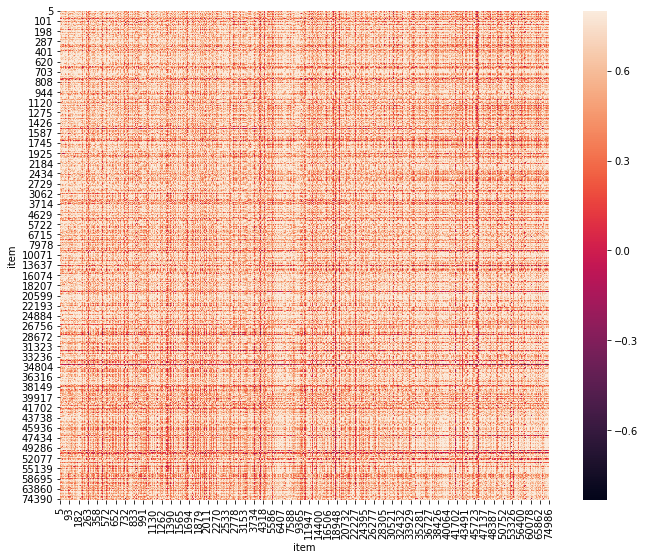

In [87]:
# Correlation Matrix Heatmap
corrmat = item_final_rating.head(10).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

matplotlib.axes._subplots.AxesSubplot

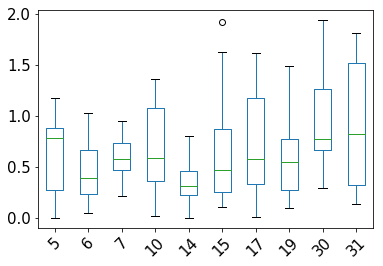

In [190]:
#similar the first 10 beers to each other 
boxplot = item_final_rating.iloc[0:10,0:10].boxplot(grid=False, rot=45, fontsize=15)
type(boxplot)

In [ ]:
#Top 5 prediction for the user -1

In [88]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

item
1387    2.201516
331     2.123305
8116    1.986213
6799    1.981935
689     1.864795
Name: 32hoss32, dtype: float64

In [131]:
#Top 5 Beer recommondation for user Cokes
item_final_rating.loc['cokes'].sort_values(ascending=False)[0:5]

item
2766     14.427434
47228    13.899062
96       13.577327
38365    13.464373
356      13.392862
Name: cokes, dtype: float64

In [132]:
#Top 5 Beer recommondation for user genog
item_final_rating.loc['genog'].sort_values(ascending=False)[0:5]

item
34313    6.162708
25989    5.312729
38426    5.163800
10301    5.029644
39775    4.991079
Name: genog, dtype: float64

In [133]:
#Top 5 Beer recommondation for user giblet
item_final_rating.loc['giblet'].sort_values(ascending=False)[0:5]

item
259      4.924558
1332     4.223652
781      4.217827
363      3.826892
24905    3.771902
Name: giblet, dtype: float64

In [ ]:
#Evaluation
#Evaluation will we same as we have seen above for the prediction. The only difference being, we will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 


In [40]:
#Using User Similarity for test users

test_beer_features=pd.pivot_table(test,index='user', columns='item', values='rating').T
test_beer_features.head()

user,321jeff,32hoss32,33nickadams,3HovsepiansBrews,3Vandoo,3rdRowTailgater,4000qtrap,49degrees,4DAloveofSTOUT,51mmz0rz,...,znichols,zoolzoo,zoso1967,zoso493,zplug123,zrab11,ztaylor1,zuffenhausen,zuggy9,zymurgy4all
item,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T


In [42]:
# User Similarity Matrix
from sklearn.metrics.pairwise import pairwise_distances
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.          0.02323535  0.         ...  0.          0.0402007
   0.        ]
 [ 0.02323535  1.         -0.07760773 ...  0.          0.
   0.01446879]
 [ 0.         -0.07760773  1.         ...  0.          0.
  -0.01483448]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.0402007   0.          0.         ...  0.          1.
  -0.0131848 ]
 [ 0.          0.01446879 -0.01483448 ...  0.         -0.0131848
   1.        ]]


In [43]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.        , 0.35750264, 0.        , ..., 0.04411741, 0.        ,
        0.00491649],
       [0.01951068, 0.22884549, 0.00731557, ..., 0.        , 0.03607817,
        0.17251122],
       [0.        , 0.06442819, 0.03622919, ..., 0.        , 0.01315055,
        0.16930095],
       ...,
       [0.        , 0.04332038, 0.        , ..., 0.0259895 , 0.14054323,
        0.05898782],
       [0.        , 0.00658278, 0.        , ..., 0.        , 0.05862753,
        0.23877823],
       [0.        , 0.30096836, 0.04541015, ..., 0.        , 0.32895131,
        0.        ]])

In [44]:
#Doing prediction for the movies rated by the user
test_user_final_rating = np.multiply(test_user_predicted_ratings.T,dummy_test)

In [45]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test.T)

In [46]:
test_user_final_rating.head()

user,321jeff,32hoss32,33nickadams,3HovsepiansBrews,3Vandoo,3rdRowTailgater,4000qtrap,49degrees,4DAloveofSTOUT,51mmz0rz,...,znichols,zoolzoo,zoso1967,zoso493,zplug123,zrab11,ztaylor1,zuffenhausen,zuggy9,zymurgy4all
item,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>=0]
X=X.fillna(1)
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [139]:
test_ =pd.pivot_table(test,index='user', columns='item', values='rating').T


In [140]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [141]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.06603515997626322


In [100]:
#Using Item similarity for test data set

test_beer_features=pd.pivot_table(test,index='user', columns='item', values='rating').T
test_beer_features.head()


user,321jeff,32hoss32,33nickadams,3HovsepiansBrews,3Vandoo,3rdRowTailgater,4000qtrap,49degrees,4DAloveofSTOUT,51mmz0rz,...,znichols,zoolzoo,zoso1967,zoso493,zplug123,zrab11,ztaylor1,zuffenhausen,zuggy9,zymurgy4all
item,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T


In [102]:
# Item Similarity Matrix
from sklearn.metrics.pairwise import pairwise_distances
test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_user_correlation)] = 0
print(test_item_correlation)

[[ 1.          0.02323535  0.         ...  0.          0.0402007
   0.        ]
 [ 0.02323535  1.         -0.07760773 ...  0.          0.
   0.01446879]
 [ 0.         -0.07760773  1.         ...  0.          0.
  -0.01483448]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.0402007   0.          0.         ...  0.          1.
  -0.0131848 ]
 [ 0.          0.01446879 -0.01483448 ...  0.         -0.0131848
   1.        ]]


In [103]:
test_item_correlation.shape

(2069, 2069)

In [104]:
test_beer_features.shape

(2069, 5606)

In [105]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

item,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
user,,,,,,,,,,,,,,,,,,,,,
321jeff,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
32hoss32,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
33nickadams,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
3HovsepiansBrews,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
3Vandoo,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0


In [135]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>1]
X=X.fillna(0)
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [136]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [137]:
#Finding RMSE
rmse = (sum(sum((test_.T - y )**2))/total_non_nan)**0.5
print(rmse)

0.1036216215565455


In [ ]:
##So IBCF seems to get better then UBCF 